In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
df=pd.read_csv('/content/titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isna().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [ ]:
df.shape

(891, 4)

In [ ]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
X,y

(      Age     Fare  Family
 0    22.0   7.2500       1
 1    38.0  71.2833       1
 2    26.0   7.9250       0
 3    35.0  53.1000       1
 4    35.0   8.0500       0
 ..    ...      ...     ...
 886  27.0  13.0000       0
 887  19.0  30.0000       0
 888   NaN  23.4500       3
 889  26.0      NaN       0
 890  32.0   7.7500       0
 
 [891 rows x 3 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
si=SimpleImputer()

In [ ]:
X_train.isna().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [ ]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()


In [ ]:
X_train['age_mean']=X_train['Age'].fillna(mean_age)

X_train['age_median']=X_train['Age'].fillna(median_age)

X_train['fare_mean']=X_train['Fare'].fillna(mean_fare)

X_train['fare_median']=X_train['Fare'].fillna(median_fare)

In [ ]:
X_train

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [ ]:
print("Original Age :",X_train['Age'].var())
print("Age variance with mean imputer:",X_train['age_mean'].var())
print("Age variance with median imputer:",X_train['age_median'].var())


print("Original Fare :",X_train['Fare'].var())
print("Fare variance with mean imputer:",X_train['fare_mean'].var())
print("Fare variance with median imputer:",X_train['fare_median'].var())


Original Age : 204.34951339046142
Age variance with mean imputer: 161.81262452718676
Age variance with median imputer: 161.98956633460548
Original Fare : 2448.1979137063163
Fare variance with mean imputer: 2324.2385256705534
Fare variance with median imputer: 2340.09102197536


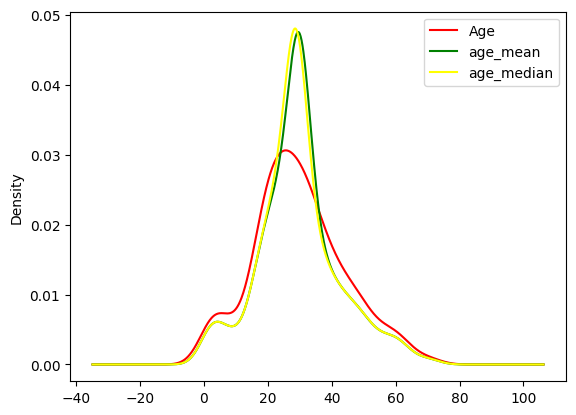

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)


X_train['Age'].plot.density(color='red',label='Age')
X_train['age_mean'].plot.density(color='green',label='Impute_mean_val')
X_train['age_median'].plot.density(color='yellow',label='Impute_median_val')

lines,legend=ax.get_legend_handles_labels()
ax.legend(lines,legend,loc='best')


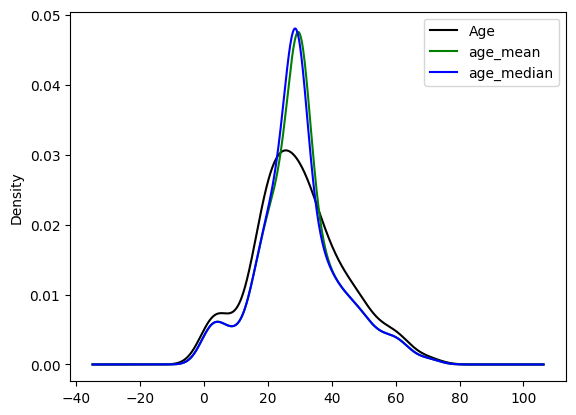

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax,color='black')
X_train['age_mean'].plot(kind='kde',ax=ax,color='green')
X_train['age_median'].plot(kind='kde',ax=ax,color='blue')

lines,legends=ax.get_legend_handles_labels()
ax.legend(lines,legends,loc='best')



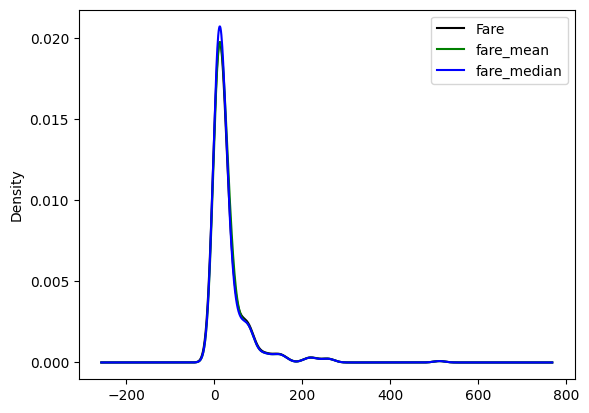

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax,color='black')
X_train['fare_mean'].plot(kind='kde',ax=ax,color='green')
X_train['fare_median'].plot(kind='kde',ax=ax,color='blue')

lines,legends=ax.get_legend_handles_labels()
ax.legend(lines,legends,loc='best')



In [ ]:
X_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [ ]:
X_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

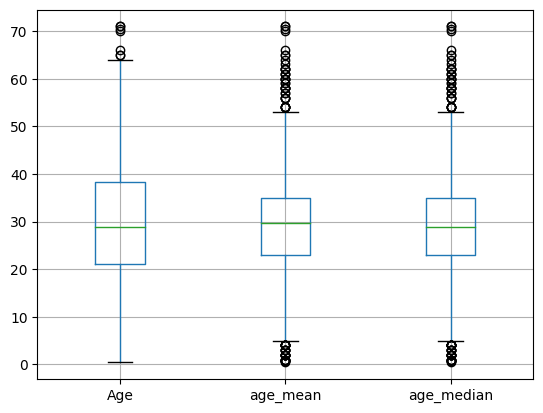

In [ ]:
X_train[['Age','age_mean','age_median']].boxplot()

<Axes: >

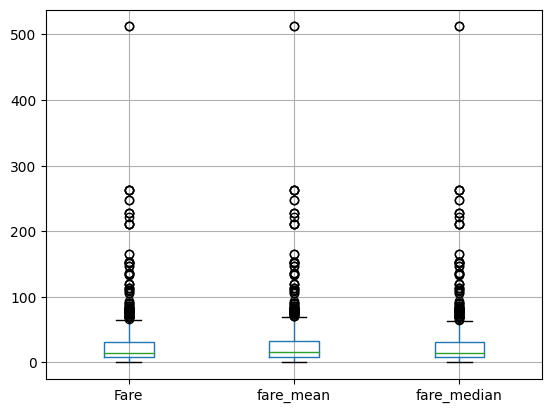

In [ ]:
X_train[['Fare','fare_mean','fare_median']].boxplot()

# *Imputation using Sklearn* #

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
imp1=SimpleImputer(strategy='median')
imp2=SimpleImputer(strategy='mean')


In [ ]:
trf=ColumnTransformer([
    ('trf1',imp1,['Age']),
    ('trf2',imp2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('trf2', SimpleImputer(), ['Fare'])])

In [ ]:
# median val of age
trf.named_transformers_['trf1'].statistics_

array([28.75])

In [ ]:
# mean vaalue of fare
trf.named_transformers_['trf2'].statistics_

array([32.61759689])

In [ ]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)


In [ ]:
col_to_drop='Survived'
col=df.drop([col_to_drop],axis=1)
col
X_train=pd.DataFrame(X_train,columns=col.columns)

In [ ]:
X_train

,Age,Fare,Family
0,40.00,27.7208,0.0
1,4.00,16.7000,2.0
2,47.00,9.0000,0.0
3,9.00,31.3875,6.0
4,20.00,9.8458,0.0
...,...,...,...
707,30.00,8.6625,0.0
708,28.75,8.7125,0.0
709,71.00,49.5042,0.0
710,28.75,221.7792,0.0
